В этом уроке вы научитесь строить доверительные интервалы.

После изучения этого урока вы будете знать:
* методы построения доверительных интервалов для среднего для нормально распределенных данных;
* методы построения доверительных интервалов для доли.


# Задание 1

Постановка задачи
Известны результаты замеров коэффициенты теплового расширения различных металлов в серии экспериментов. Построить 95% доверительные интервалы для истинного значения коэффициентов теплового расширения.

aluminum - коэффициенты теплового расширения аллюминия.
copper - коэффициенты теплового расширения меди.
steel - коэффициенты теплового расширения стали.

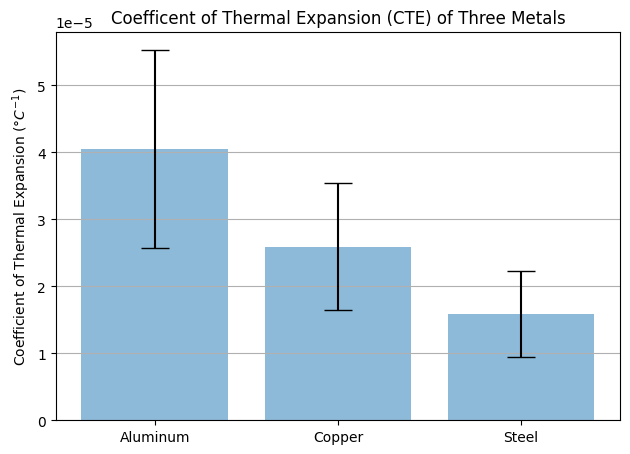

In [1]:
import numpy as np
import matplotlib.pyplot as plt


aluminum = np.array([6.4e-5 , 3.01e-5 , 2.36e-5, 3.0e-5, 7.0e-5, 4.5e-5, 3.8e-5, 4.2e-5, 2.62e-5, 3.6e-5])
copper = np.array([4.5e-5 , 1.97e-5 , 1.6e-5, 1.97e-5, 4.0e-5, 2.4e-5, 1.9e-5, 2.41e-5 , 1.85e-5, 3.3e-5 ])
steel = np.array([3.3e-5 , 1.2e-5 , 0.9e-5, 1.2e-5, 1.3e-5, 1.6e-5, 1.4e-5, 1.58e-5, 1.32e-5 , 2.1e-5])

aluminum_mean = np.mean(aluminum)
copper_mean = np.mean(copper)
steel_mean = np.mean(steel)

aluminum_std = np.std(aluminum)
copper_std = np.std(copper)
steel_std = np.std(steel)

materials = ['Aluminum', 'Copper', 'Steel']
x_pos = np.arange(len(materials))
CTEs = [aluminum_mean, copper_mean, steel_mean]
error = [aluminum_std, copper_std, steel_std]


fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Coefficient of Thermal Expansion ($\degree C^{-1}$)')
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

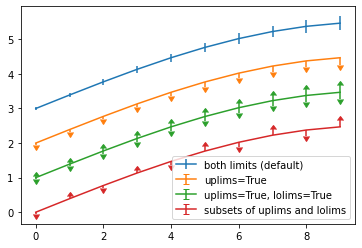

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
             label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
             label='subsets of uplims and lolims')

plt.legend(loc='lower right')

# Задание 2

Точечная оценка доли может быть недостаточно информативной для практикующего клинициста; кроме того, в случае, если в выборке наблюдалось 0 событий, точечная оценка доли (очевидно, равная нулю) не отражает истинную вероятность события. В задании приведены 95%-е интервальные оценки доли.

В случае, когда распределение числа событий хорошо аппроксимируется нормальным законом, используются асимптотические оценки для границ доверительных интервалов.

В случае неприменимости асимптотических формул [Реброва, стр. 143] используется закон точного биномиального распределения и соответствующие формулы для нахождения границ 95%-х доверительных интервалов [Большов Смирнов, стр. 69].
Нижняя и верхняя границы 95%-го доверительного интервала определяется соответственно как 0.025- и 0.975-квантиль В-распределения (читать, бета-распределения) с нижеприведенными параметрами:

m  и  n – m + 1 для нижней границы,

m + 1  и  n – m для верхней границы.

Здесь n – число наблюдений (т. е. объем выборки), m – число произошед-ших событий.


Проводится операция липосакция.
В задании приведены наблюдения за редкими (или нечастыми) осложнениями. Известно, сколько наступило осложнений из скольких операций. Например, "5 из 38" означает, что из 38 пациентов 5 имели осложнения.

Требуется построить 95% доверительные интервалы для частоты осложнений.

In [ ]:
from scipy.stats import beta
import re
import array
import math

#A point estimate of the proportion may not be informative enough for the practicing clinician;
#moreover, if 0 events were observed in the sample, the point estimate of the share (obviously equal to zero) does not reflect the true probability of the event.
#The paper presents 95% interval estimates of the share.
#In the case when the distribution of the number of events is well approximated by the normal law,
#asymptotic estimates for the boundaries of the confidence intervals are used.
#In case of inapplicability of asymptotic formulas [Rebrova, p. 143], the law of exact binomial distribution
#and the corresponding formulas for finding the boundaries of 95% confidence intervals are used [Bol'shov, p. 69].
#The lower and upper limits of the 95% confidence interval are defined as the 0.025- and 0.975-quantile of the B-distribution
#(read, beta distribution), respectively, with the following parameters:
#m and n - m + 1 for the lower bound,
#m + 1 and n – m for the upper bound.
#Here n is the number of observations (i.e., the sample size), m is the number of events that have occurred.

lines = '''113 from 161
21 from 38
134 from 199'''

tmpl = re.compile('(\d+) from (\d+)')
low = []
upp = []

data = lines.split("\n")
for i in range(len(data)):
  num = tmpl.match(data[i])
  case = float(num.group(1))
  observed = float(num.group(2))
  lowBound = beta.ppf(0.025, case, observed - case + 1)
  low.append(0 if math.isnan(lowBound) else lowBound)
  upp.append(beta.ppf(0.975, case + 1, observed - case))

for i in range(len(low)):
  print("%2.4f, %2.4f" % (low[i], upp[i]))
  #print("%2.4f" % (upp[i]))

0.6248, 0.7713
0.3830, 0.7138
0.6035, 0.7380
